<a href="https://colab.research.google.com/github/Fidan6557/diabetes-prediction-svm/blob/main/DIABET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('diabetes_gender_data_with_country.csv')
df

,Gender,Age,BMI,Glucose,BloodPressure,PhysicalActivity,Diabetes,Country
0,Male,78,20.4,158,75,8.4,Var,USA
1,Female,38,36.2,169,89,8.3,Var,Azerbaijan
2,Male,49,32.9,76,104,0.1,Var,Azerbaijan
3,Male,40,24.7,114,82,7.5,Yox,China
4,Male,50,18.4,127,87,7.6,Yox,Canada
...,...,...,...,...,...,...,...,...
495,Male,78,25.2,175,111,5.2,Var,Turkey
496,Male,23,30.0,190,95,3.8,Yox,Canada
497,Female,35,32.5,124,81,0.1,Var,China
498,Male,68,31.1,81,101,3.9,Var,USA


In [ ]:
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df.head()

,Gender,Age,BMI,Glucose,BloodPressure,PhysicalActivity,Diabetes,Country
0,Male,78,20.4,158,75,8.4,Var,USA
1,Female,38,36.2,169,89,8.3,Var,Azerbaijan
2,Male,49,32.9,76,104,0.1,Var,Azerbaijan
3,Male,40,24.7,114,82,7.5,Yox,China
4,Male,50,18.4,127,87,7.6,Yox,Canada


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical columns
label_cols = ['Gender', 'Country', 'PhysicalActivity']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Check the result
df.head()

Gender              0
Age                 0
BMI                 0
Glucose             0
BloodPressure       0
PhysicalActivity    0
Diabetes            0
Country             0
dtype: int64


,Gender,Age,BMI,Glucose,BloodPressure,PhysicalActivity,Diabetes,Country
0,1,78,20.4,158,75,84,Var,7
1,0,38,36.2,169,89,83,Var,0
2,1,49,32.9,76,104,1,Var,0
3,1,40,24.7,114,82,75,Yox,2
4,1,50,18.4,127,87,76,Yox,1


In [ ]:
# Features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.84
              precision    recall  f1-score   support

         Var       0.77      0.91      0.84        45
         Yox       0.91      0.78      0.84        55

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

         Var       0.94      1.00      0.97        45
         Yox       1.00      0.95      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix:
 [[45  0]
 [ 3 52]]


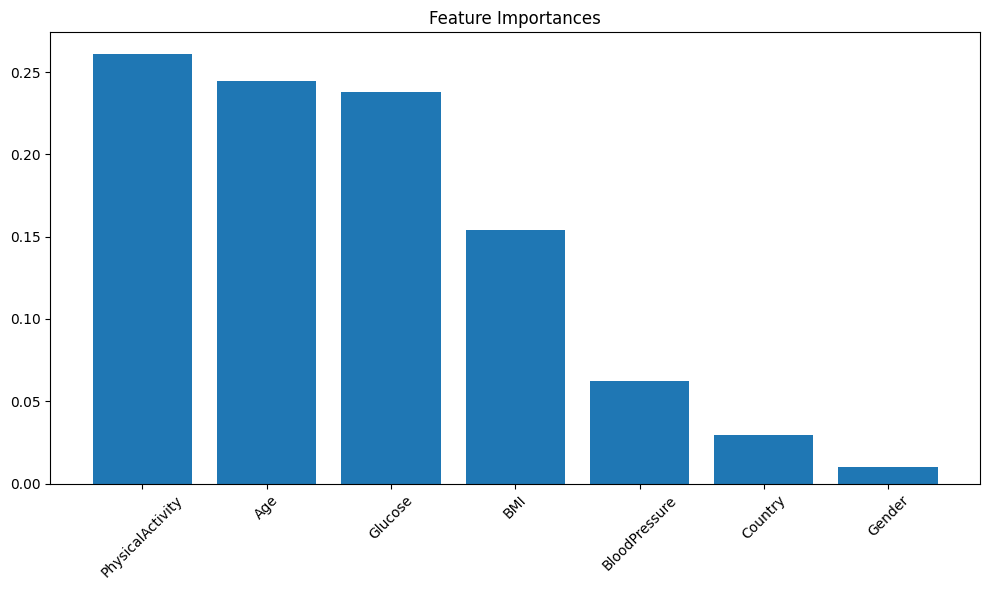

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
columns = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

         Var       0.94      1.00      0.97        45
         Yox       1.00      0.95      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100


Confusion Matrix:
 [[45  0]
 [ 3 52]]


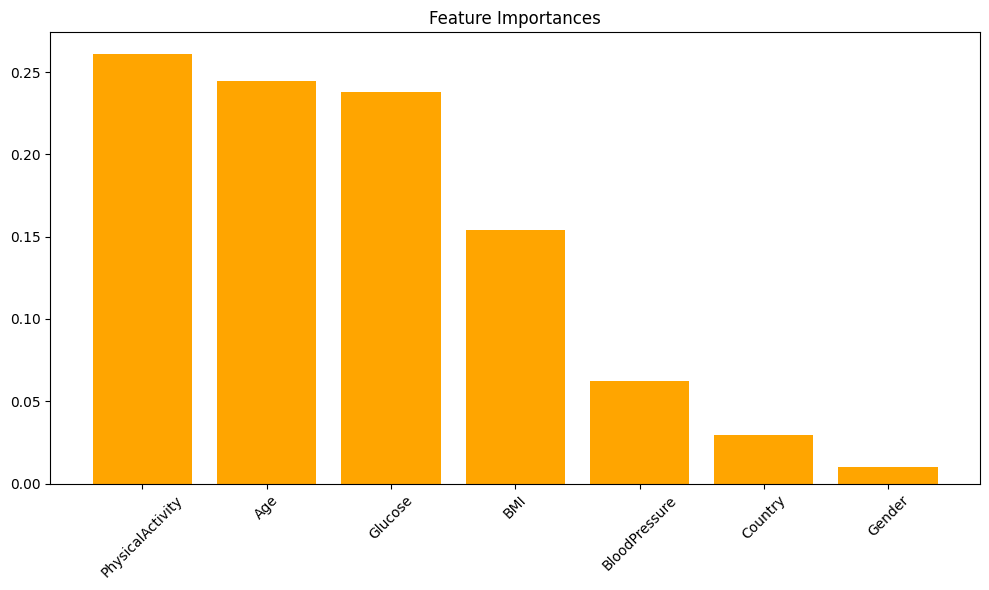

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
columns = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center', color='orange')
plt.xticks(range(X.shape[1]), [columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


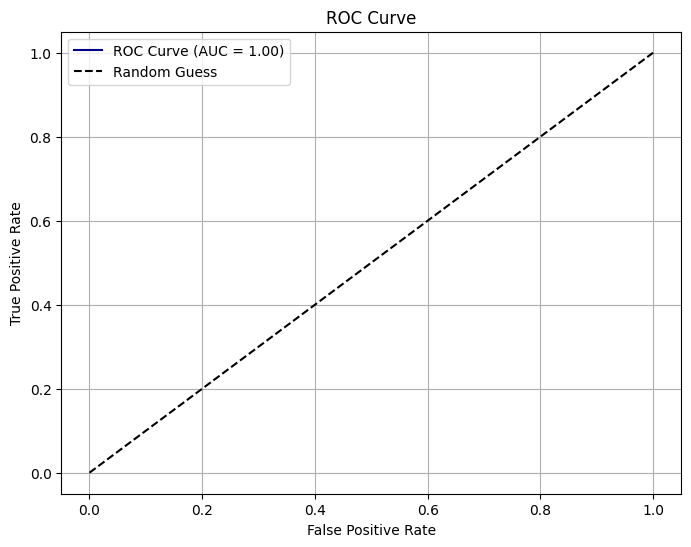

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Modelin ehtimal proqnozları (1 olma ehtimalı)
y_proba = model.predict_proba(X_test)[:, 1]

# ROC əyrisi üçün məlumatlar
# Specify pos_label based on how 'Var' and 'Yox' were encoded.
# Assuming 'Var' was encoded as 1 and 'Yox' as 0 by LabelEncoder
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)), color='darkblue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # təsadüfi model xətti
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Əgər 0 və 1 varsa, onu Type 1, Type 2, No diabetes formatına çevirək
# Sadəcə test məqsədli 3 sinif düzəldək:
import numpy as np

# Random şəkildə Diabetes kolonunu Type 1, Type 2 və No diabetes kimi ayıraq
conditions = [
    (df['Diabetes'] == 0),
    (df['Diabetes'] == 1) & (df['Glucose'] > 150),
    (df['Diabetes'] == 1) & (df['Glucose'] <= 150)
]
choices = ['No diabetes', 'Type 2', 'Type 1']
# Add a default value with the same data type as choices (string)
df['DiabetesType'] = np.select(conditions, choices, default='Unknown')

In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Make sure numpy is imported

# Assuming df is already loaded and 'DiabetesType' is created

# Yeni target
y = df['DiabetesType']
X = df.drop(['Diabetes', 'DiabetesType'], axis=1)

# Encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
y = LabelEncoder().fit_transform(y)

# Train/Test split və scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add this check to see the number of unique classes in y_train
print(f"Number of unique classes in y_train: {len(np.unique(y_train))}")
print(f"Unique classes in y_train: {np.unique(y_train)}")

# XGBoost
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') # use_label_encoder is deprecated
xgb_model = XGBClassifier(eval_metric='mlogloss') # Remove deprecated parameter
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# SVM
svm_model = SVC(probability=True)
# The following line might fail if the print statement above shows only 1 unique class
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Qiymətləndir
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))
print("\nSVM Report:\n", classification_report(y_test, svm_pred))

Number of unique classes in y_train: 3
Unique classes in y_train: [0 1 2]
XGBoost Accuracy: 0.29
SVM Accuracy: 0.29

XGBoost Report:
               precision    recall  f1-score   support

           0       0.21      0.30      0.25        27
           1       0.32      0.32      0.32        34
           2       0.36      0.26      0.30        39

    accuracy                           0.29       100
   macro avg       0.30      0.29      0.29       100
weighted avg       0.31      0.29      0.29       100


SVM Report:
               precision    recall  f1-score   support

           0       0.24      0.44      0.32        27
           1       0.35      0.26      0.30        34
           2       0.32      0.21      0.25        39

    accuracy                           0.29       100
   macro avg       0.30      0.30      0.29       100
weighted avg       0.31      0.29      0.28       100

